In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse.linalg
np.set_printoptions(suppress=True)

In [2]:
def expm_multiply_ground_truth(A, v):
    return scipy.sparse.linalg.expm_multiply(A, v)

In [3]:
def load_A_from_file(name):
    def get_data_path():
        root_dir = "lagrange-ng-regression/"
        data_path = f"100taxa_6regions_1workers_1tpw/{name}/A.txt"
        return root_dir + data_path
    with open(get_data_path(), 'r') as f:
        data = f.read().strip().split()
    n = int(data[0])
    data = np.array(data[1:]).reshape((n, n)).astype('double')
    return n, data

In [4]:
def generate_v(n, seed):
    np.random.seed(seed)
    v = np.random.rand(n).astype('double')
    for i in range(v.shape[0]):
        print(f"v[{i}] = {v[i]};")
    return v

In [5]:
n, A = load_A_from_file('11')
v = generate_v(n, 1234)
eAv_true = expm_multiply_ground_truth(A, v)
print(eAv_true)

v[0] = 0.1915194503788923;
v[1] = 0.6221087710398319;
v[2] = 0.4377277390071145;
v[3] = 0.7853585837137692;
v[4] = 0.7799758081188035;
v[5] = 0.2725926052826416;
v[6] = 0.2764642551430967;
v[7] = 0.8018721775350193;
v[8] = 0.9581393536837052;
v[9] = 0.8759326347420947;
v[10] = 0.35781726995786667;
v[11] = 0.5009951255234587;
v[12] = 0.6834629351721363;
v[13] = 0.7127020269829002;
v[14] = 0.37025075479039493;
v[15] = 0.5611961860656249;
v[16] = 0.5030831653078097;
v[17] = 0.013768449590682241;
v[18] = 0.772826621612374;
v[19] = 0.8826411906361166;
v[20] = 0.3648859839013723;
v[21] = 0.6153961784334937;
v[22] = 0.07538124164297655;
v[23] = 0.3688240060019745;
v[24] = 0.9331401019825216;
v[25] = 0.6513781432265774;
v[26] = 0.3972025777261542;
v[27] = 0.7887301429407455;
v[28] = 0.31683612216887125;
v[29] = 0.5680986526260692;
v[30] = 0.8691273895612258;
v[31] = 0.43617342389567937;
v[32] = 0.8021476420801591;
v[33] = 0.14376682451456457;
v[34] = 0.7042609711183354;
v[35] = 0.7045813081895

In [6]:
eAv_cpp = [0.191516, 0.454689, 0.443609, 0.50566, 0.440876, 0.496711, 0.488873, 0.505428, 0.461925, 0.508275, 0.498543, 0.511537, 0.493369, 0.504495, 0.497792, 0.50239, 0.443361, 0.50124, 0.497379, 0.511935, 0.48747, 0.502314, 0.498695, 0.503612, 0.503553, 0.512263, 0.507591, 0.509675, 0.49959, 0.502272, 0.498566, 0.499837, 0.443993, 0.501283, 0.495337, 0.511289, 0.487692, 0.503024, 0.497988, 0.503809, 0.496681, 0.509025, 0.502965, 0.50746, 0.496388, 0.500933, 0.496202, 0.498823, 0.494701, 0.508824, 0.505821, 0.509789, 0.496853, 0.501779, 0.498954, 0.501046, 0.505806, 0.508028, 0.504502, 0.505185, 0.497308, 0.49877, 0.49581, 0.496819]

In [7]:
print(np.abs((eAv_cpp - eAv_true) / eAv_true))

[0.00001802 0.0000007  0.00000064 0.00000092 0.00000467 0.00000109
 0.00000169 0.00000026 0.00000194 0.00000162 0.00000026 0.0000007
 0.00000079 0.00000023 0.0000002  0.00000004 0.00000088 0.00000049
 0.00000049 0.00000139 0.00000097 0.00000012 0.00000051 0.0000005
 0.00000003 0.0000005  0.00000082 0.00000102 0.00000098 0.00000065
 0.00000227 0.00000109 0.0000038  0.00000042 0.00000006 0.00000247
 0.00000062 0.00000058 0.00000145 0.00000093 0.00000011 0.00000004
 0.00000077 0.00000156 0.00000056 0.00000006 0.00000103 0.00000049
 0.00000142 0.00000014 0.00000178 0.00000189 0.00000198 0.00000124
 0.00000034 0.00000273 0.00000191 0.00000085 0.00000124 0.00000082
 0.0000012  0.00000033 0.00000088 0.00000014]


In [128]:
timings_pade_ss = [845.24, 831.37, 787.76, 1229.56, 2481.82, 2734.35, 4100.88, 2854.04, 1073.54, 1426.2, 1093.66, 784.45, 2340.65, 1023.43, 829.63, 1369.63, 903.58, 947.82, 854.22, 812.62, 1724.26, 2213.08, 1630.75, 1288.78, 1004.92, 823.79, 828.84, 818.23, 894.03, 1786.97, 1739.07, 1219.11, 844.28, 829.46, 856.34, 1255.08, 1009.53, 1159.29, 1248.23, 1147.02, 921.76, 1229.96, 1026.05, 1201.17, 1380.16, 1131.06, 3465.95, 1132.51, 1246.11, 1031.45, 883.86, 1083.1, 1577.49, 1538.32, 926.74, 2222.86, 1003.74, 1048.2, 900.3, 1176.82, 885.63, 855.15, 2503.79, 2592.19, 1864.68, 2009.65, 926.43, 988.19, 1156.87, 882.49, 901.18, 1156.05, 1049.51, 1014.25, 865.1, 908.73, 1158.26, 2159.25, 1780.65, 2147.14, 992.5, 1913.48, 1534.92, 867.69, 898.21, 913.35, 1427.54, 2654.93, 1904.65, 1640.07, 1508.27, 1322.15, 1840.82, 870.25, 911.96, 873.98, 1791.68, 1422.75, 872.98, 998.43]

In [129]:
timings_arnoldi_chebyshev = [39.09, 70.06, 104.65, 139.71, 174.96, 211.97, 247.14, 280.35, 315.4, 350.53, 384.68, 420.47, 455.93, 491.11, 523.93, 560.24, 594.99, 899.43, 698.37, 698.99, 763.63, 768.5, 804.29, 839.03, 874.73, 909.18, 1376.34, 982.69, 1022.01, 1059.26, 1087.92, 1120.46, 1157.63, 1191.55, 1231.3, 1265.87, 1315.92, 1334.73, 1369.02, 1407.27, 1446.87, 1476.81, 1516.27, 1574.68, 1660.44, 1688.94, 1682.26, 1689.16, 1775.35, 1783.55, 1787.67, 1824.57, 1858.06, 1909.25, 1946.66, 1959.28, 1990.79, 2023.62, 2149.52, 2946.3, 2710.04, 3363.19, 2311.74, 2236.73, 2304.89, 2911.76, 2365.16, 2407.57, 2555.79, 2485.9, 2489.67, 2522.84, 5071.23, 2646.53, 2779.77, 2810.44, 2701.34, 2739.5, 2862.09, 3469.32, 4363.75, 2928.25, 7589.78, 2953.94, 2988.95, 4583.61, 3067.14, 3099.3, 7356.06, 3151.34, 3765.19, 3462.44, 3294.56, 3282.49, 3368.39, 3435.04, 3394.1, 4034.36, 4001.4, 3510.62]

In [130]:
timings_arnoldi_chebyshev_omp = [320.12, 471.49, 68.32, 109.09, 115.56, 132.45, 147.14, 175.56, 188.86, 213.95, 234.76, 259.42, 1420.34, 1188.55, 333.98, 345.52, 368.32, 391.32, 410.4, 466.86, 457.98, 504.55, 505.31, 538.31, 554.05, 687.24, 1097.73, 1255.04, 616.35, 635.37, 696.26, 1513.64, 3122.16, 733.84, 767.96, 769.99, 908.02, 1725.82, 844.76, 863.36, 876.35, 912.06, 934.55, 940.69, 979.04, 1002.04, 1011.38, 1047.48, 1076.85, 2429.54, 3975.58, 1191.91, 1132.08, 1161.09, 1183.36, 3519.51, 6528.37, 9037.56, 1589.54, 1328.01, 1353.22, 1327.68, 1355.51, 1393.63, 1450.55, 3804.62, 1448.49, 1454.97, 1550.36, 1514.55, 1586.32, 1584.95, 1635.43, 1644.38, 1638.14, 1672.78, 1724.55, 1700.47, 3668.86, 1757.91, 1853.92, 1749.13, 1833.68, 1842.07, 1872.34, 1850.03, 1913.88, 1875.6, 1918.9, 1951.36, 1993.96, 2137.57, 2577.45, 2327.98, 2396.59, 2306.54, 2254.03, 2263.35, 2249.37, 2569.06]

In [131]:
timings_arnoldi_pade_ss = [209.92, 134.14, 187.26, 254.4, 323.88, 1094.51, 699.46, 550.7, 749.06, 885.16, 764.1, 1236.04, 1157.23, 1438.84, 1341.2, 1257.47, 1223.49, 1709.06, 1218.14, 2162.01, 1513.37, 1566.11, 1495.02, 1769.39, 1840.56, 1815.47, 2057.51, 2305.65, 1936.35, 2136.62, 2863.9, 2444.9, 2648.18, 2971.86, 3116.16, 3072.21, 2798.73, 3167.62, 3668.52, 3195.97, 3515.88, 3357.53, 3531.1, 4019.69, 4797.23, 3729.24, 3861.81, 4698.73, 4395.35, 3963.48, 4631.72, 5349.17, 4550.36, 4751.59, 4602.1, 4347.73, 4959.93, 5179.34, 5041.89, 4807, 5642.38, 5463.7, 6458.76, 4832.28, 6079.4, 6192.11, 5833.1, 5678.8, 6274.92, 5121.01, 5823.61, 5403.61, 5891.73, 6018.85, 6713.43, 6591.43, 6559.66, 6853.42, 6209.27, 5973.04, 7538.28, 6602.94, 7305.42, 7576.97, 6596.28, 6652.92, 6084.35, 7021.33, 6567.87, 5966.84, 6076.11, 6822.73, 7577.82, 6701.81, 8704.94, 8219.99, 8339.21, 8413.91, 7267.33, 8112.55]

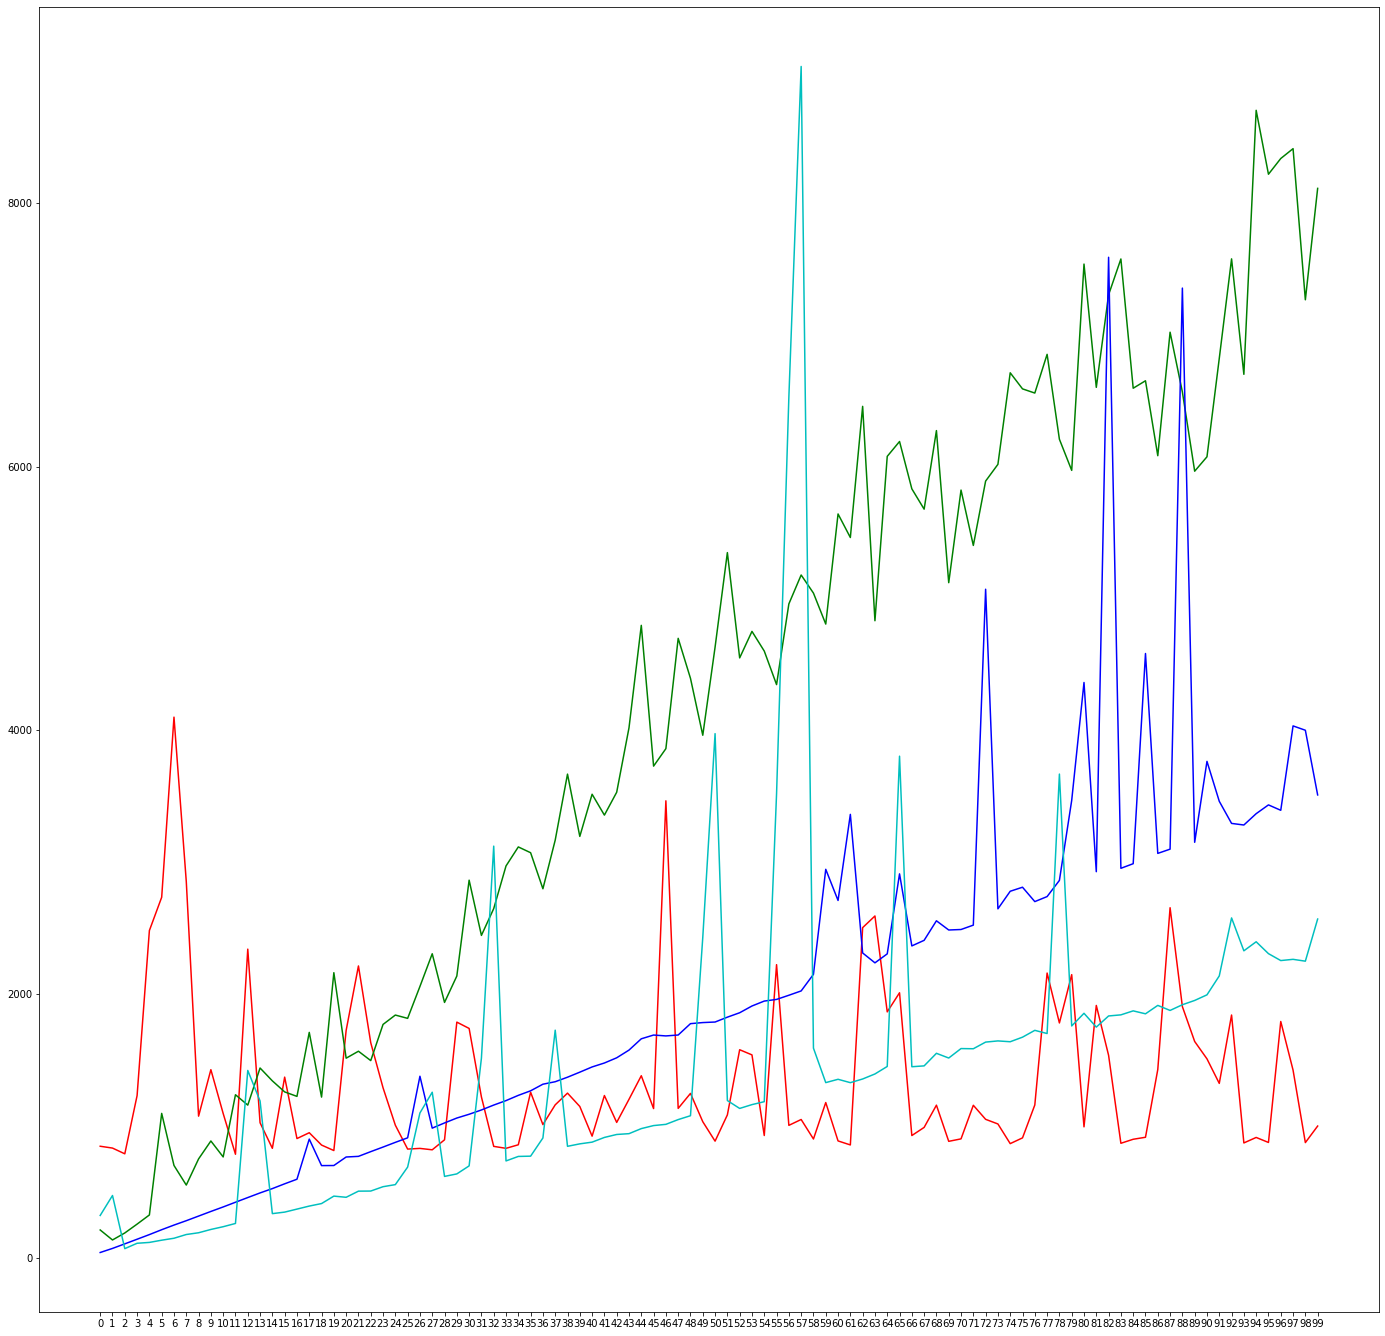

In [132]:
plt.figure(figsize=(24, 24))
plt.xticks(range(100))
plt.plot(timings_pade_ss, 'r')
plt.plot(timings_arnoldi_pade_ss, 'g')
plt.plot(timings_arnoldi_chebyshev, 'b')
plt.plot(timings_arnoldi_chebyshev_omp, 'c')